<a href="https://colab.research.google.com/github/ARKAL-J04/MachineLearning2025/blob/main/MP_2/AI_HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.path import Path
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
from scipy import stats
import torch
from torch.utils.data import TensorDataset
from tqdm import tqdm
import torch.nn as nn
import torch.optim as optim

#1

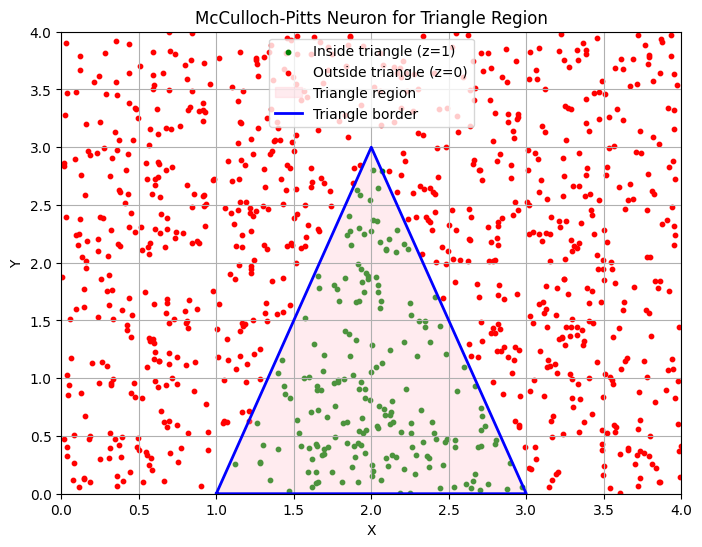

In [ ]:
# McCulloch-Pitts Neuron
class McCulloch_Pitts_neuron():
    def __init__(self, weights, threshold):
        self.weights = weights
        self.threshold = threshold

    def model(self, x):
        return 1 if np.dot(self.weights, x) >= self.threshold else 0

# Triangle region detector
def is_inside_triangle(x, y):
    # Left edge: -3x + y <= -3  <=>  3x - y >= 3
    n1 = McCulloch_Pitts_neuron(weights=[3, -1], threshold=3)

    # Right edge: 3x + y <= 9
    n2 = McCulloch_Pitts_neuron(weights=[-3, -1], threshold=-9)

    # Bottom edge: y >= 0
    n3 = McCulloch_Pitts_neuron(weights=[0, 1], threshold=0)

    z1 = n1.model([x, y])
    z2 = n2.model([x, y])
    z3 = n3.model([x, y])

    # Final output neuron
    output_neuron = McCulloch_Pitts_neuron([1, 1, 1], threshold=3)
    return output_neuron.model([z1, z2, z3])

# Generate data
N = 1000
x_vals = np.random.uniform(0, 4, N)
y_vals = np.random.uniform(0, 4, N)

inside_x, inside_y = [], []
outside_x, outside_y = [], []

for i in range(N):
    x = x_vals[i]
    y = y_vals[i]
    if is_inside_triangle(x, y):
        inside_x.append(x)
        inside_y.append(y)
    else:
        outside_x.append(x)
        outside_y.append(y)

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(inside_x, inside_y, c='green', label='Inside triangle (z=1)', s=10)
plt.scatter(outside_x, outside_y, c='red', label='Outside triangle (z=0)', s=10)

# Draw triangle
triangle_x = [1, 2, 3, 1]
triangle_y = [0, 3, 0, 0]
plt.fill(triangle_x[:-1], triangle_y[:-1], color='pink', alpha=0.3, label='Triangle region')
plt.plot(triangle_x, triangle_y, 'b-', linewidth=2, label='Triangle border')

plt.title("McCulloch-Pitts Neuron for Triangle Region")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.xlim(0, 4)
plt.ylim(0, 4)
plt.legend()
plt.show()


#2

##2.1.2

In [ ]:
#https://drive.google.com/file/d/1dXB660Jt-QwFMeHAmPAx3Im24vKT4maP/view?usp=sharing

In [ ]:
!pip install --upgrade --no-cache-dir gdown
!gdown 1dXB660Jt-QwFMeHAmPAx3Im24vKT4maP

Downloading...
From: https://drive.google.com/uc?id=1dXB660Jt-QwFMeHAmPAx3Im24vKT4maP
To: /content/weather_prediction_dataset.csv
100% 2.77M/2.77M [00:00<00:00, 35.7MB/s]


In [ ]:
# Creating the dataframe
df = pd.read_csv('/content/weather_prediction_dataset.csv')


In [ ]:
# استخراج نام شهرها از ستون‌هایی که به شکل "CITY_FEATURE" هستند
city_columns = df.columns
city_names = sorted(set(col.split('_')[0] for col in city_columns if '_' in col))

# چاپ لیست شهرها
print(city_names)


['BASEL', 'BUDAPEST', 'DE', 'DRESDEN', 'DUSSELDORF', 'HEATHROW', 'KASSEL', 'LJUBLJANA', 'MAASTRICHT', 'MALMO', 'MONTELIMAR', 'MUENCHEN', 'OSLO', 'PERPIGNAN', 'ROMA', 'SONNBLICK', 'STOCKHOLM', 'TOURS']


In [ ]:
# تعریف شهرهای فرانسوی بر اساس تحلیل قبلی
french_cities = ['MONTELIMAR', 'PERPIGNAN', 'TOURS']

# فیلتر کردن فقط ستون‌هایی که مربوط به این شهرها هستند
filtered_columns = [col for col in df.columns if any(col.startswith(city + '_') for city in french_cities)]

# ایجاد دیتافریم جدید فقط با شهرهای فرانسوی
df_french = df[filtered_columns]

# مشاهده شکل و نمونه‌ای از داده‌ها
print(df_french.shape)
print(df_french.head())

(3654, 24)
   MONTELIMAR_wind_speed  MONTELIMAR_humidity  MONTELIMAR_pressure  \
0                    3.8                 0.85               1.0269   
1                    5.8                 0.82               1.0287   
2                    0.4                 0.92               1.0316   
3                    1.1                 0.85               1.0274   
4                    3.4                 0.82               1.0234   

   MONTELIMAR_global_radiation  MONTELIMAR_precipitation  \
0                         0.30                       0.0   
1                         0.54                       0.0   
2                         0.53                       0.0   
3                         0.64                       0.0   
4                         0.70                       0.0   

   MONTELIMAR_temp_mean  MONTELIMAR_temp_min  MONTELIMAR_temp_max  \
0                   5.5                  2.5                  8.5   
1                   8.3                  6.8                  9.8   


In [ ]:
# شناسایی ستون‌های زمانی
time_columns = [col for col in df.columns if col in ['DATE', 'MONTH']]

# ترکیب داده‌های شهرهای فرانسوی با اطلاعات زمانی
final_french_df = df[time_columns + filtered_columns]

# نمایش شکل نهایی داده‌ها
print(final_french_df.shape)
print(final_french_df.head())


(3654, 26)
       DATE  MONTH  MONTELIMAR_wind_speed  MONTELIMAR_humidity  \
0  20000101      1                    3.8                 0.85   
1  20000102      1                    5.8                 0.82   
2  20000103      1                    0.4                 0.92   
3  20000104      1                    1.1                 0.85   
4  20000105      1                    3.4                 0.82   

   MONTELIMAR_pressure  MONTELIMAR_global_radiation  MONTELIMAR_precipitation  \
0               1.0269                         0.30                       0.0   
1               1.0287                         0.54                       0.0   
2               1.0316                         0.53                       0.0   
3               1.0274                         0.64                       0.0   
4               1.0234                         0.70                       0.0   

   MONTELIMAR_temp_mean  MONTELIMAR_temp_min  MONTELIMAR_temp_max  ...  \
0                   5.5        

In [ ]:
# بررسی بازه زمانی با ستون DATE
start_date = df['DATE'].min()
end_date = df['DATE'].max()
print("Start Date:", start_date)
print("End Date:", end_date)

Start Date: 20000101
End Date: 20100101


##2.1.4

In [ ]:
# جدا کردن ستون‌های عددی برای نرمال‌سازی
data_columns = [col for col in final_french_df.columns if col not in ['DATE', 'MONTH']]
numeric_data = final_french_df[data_columns]

# نرمال‌سازی min-max
normalized_data = (numeric_data - numeric_data.min()) / (numeric_data.max() - numeric_data.min())

# ترکیب مجدد با ستون‌های زمانی
preprocessed_df = final_french_df[['DATE', 'MONTH']].copy()
preprocessed_df = pd.concat([preprocessed_df, normalized_data], axis=1)


In [ ]:
# تنظیمات پنجره
window_size = 5
target_column = 'TOURS_temp_max'

# حذف ردیف‌های ناقص
preprocessed_df_clean = preprocessed_df.dropna().reset_index(drop=True)

# تعریف لیست‌های ویژگی‌ها و هدف
X = []
y = []

# پیمایش داده‌ها برای ایجاد sliding windows
for i in range(len(preprocessed_df_clean) - window_size):
    window_data = preprocessed_df_clean.iloc[i:i + window_size]
    next_day_target = preprocessed_df_clean.iloc[i + window_size][target_column]

    # ویژگی‌ها: داده‌های 5 روز اخیر، بدون ستون‌های زمانی
    features = window_data.drop(columns=['DATE', 'MONTH']).values.flatten()

    X.append(features)
    y.append(next_day_target)

# تبدیل به آرایه‌های NumPy
X = np.array(X)
y = np.array(y)

# نمایش ابعاد نهایی برای ورودی مدل
print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (3649, 120)
y shape: (3649,)


In [ ]:
# تبدیل ستون DATE به رشته برای فیلتر سال‌ها
preprocessed_df_clean['DATE'] = preprocessed_df_clean['DATE'].astype(str)

# تنظیمات
window_size = 5
target_column = 'TOURS_temp_max'

X = []
y = []
dates = []

# ایجاد sliding window با ثبت تاریخ هدف
for i in range(len(preprocessed_df_clean) - window_size):
    window = preprocessed_df_clean.iloc[i:i + window_size]
    target_row = preprocessed_df_clean.iloc[i + window_size]

    # ویژگی‌ها: 5 روز × 24 ویژگی (شکل: 5×24)
    X.append(window.drop(columns=['DATE', 'MONTH']).values)

    # هدف: دمای TOURS در روز ششم
    y.append(target_row[target_column])

    # ثبت تاریخ برای تشخیص train/test
    dates.append(target_row['DATE'])

# تبدیل به آرایه‌های NumPy
X = np.array(X)           # (نمونه‌ها، 5، 24)
y = np.array(y)           # (نمونه‌ها،)
dates = np.array(dates)   # (نمونه‌ها،)

# جدا کردن داده‌های مربوط به سال 2009 برای تست
test_mask = np.char.startswith(dates, '2009')
X_train = X[~test_mask]
y_train = y[~test_mask]
X_test = X[test_mask]
y_test = y[test_mask]

# نمایش ابعاد نهایی
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

X_train: (3284, 5, 24)
y_train: (3284,)
X_test: (365, 5, 24)
y_test: (365,)


##2.3

In [ ]:
X_train_tensor = torch.tensor(X_train.reshape(X_train.shape[0], -1), dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test.reshape(X_test.shape[0], -1), dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# تعریف مدل شبکه عصبی طبق شکل مقاله
class MLP(nn.Module):
    def __init__(self, input_size):
        super(MLP, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_size, 64),
            nn.ReLU(),
            nn.Linear(64, 1)
        )
    def forward(self, x):
        return self.net(x)

# تابع آموزش برای یک نرخ یادگیری خاص
def train_model_final(learning_rate, epochs=200):
    model = MLP(input_size=120)
    criterion = nn.MSELoss()
    optimizer = optim.SGD(model.parameters(), lr=learning_rate)

    train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=64)

    train_losses = []
    test_losses = []

    for epoch in tqdm(range(epochs), desc=f"Training (lr={learning_rate})"):
        model.train()
        train_loss = 0
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            y_pred = model(X_batch)
            loss = criterion(y_pred, y_batch)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
        train_losses.append(train_loss / len(train_loader))

        model.eval()
        test_loss = 0
        with torch.no_grad():
            for X_batch, y_batch in test_loader:
                y_pred = model(X_batch)
                loss = criterion(y_pred, y_batch)
                test_loss += loss.item()
        test_losses.append(test_loss / len(test_loader))

    return train_losses, test_losses

# اجرای مدل برای هر سه نرخ یادگیری
final_results = {}
final_lrs = [1, 1e-3, 1e-8]
for lr in final_lrs:
    train_loss, test_loss = train_model_final(learning_rate=lr, epochs=200)
    final_results[lr] = (train_loss, test_loss)



NameError: name 'num_epochs' is not defined

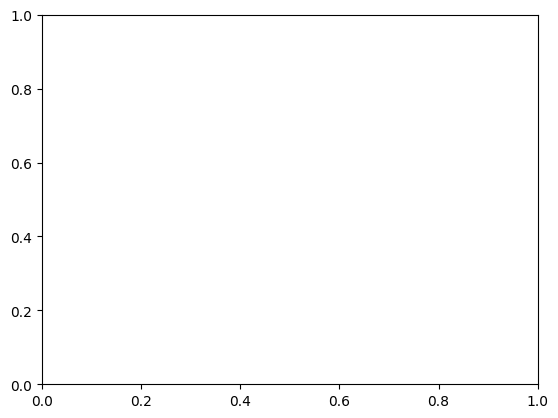

In [ ]:
import matplotlib.pyplot as plt
from IPython.display import clear_output

# لیست‌هایی برای ذخیره‌ی مقدار خطای آموزش و تست
train_losses = []
val_losses = []

# مقداردهی اولیه‌ی نمودار
plt.ion()
fig, ax = plt.subplots()

for epoch in range(num_epochs):
    # --- آموزش ---
    model.train()
    total_train_loss = 0
    for batch in train_loader:
        # فرض: ورودی‌ها و خروجی‌های مدل از batch استخراج می‌شوند
        inputs, targets = batch
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        total_train_loss += loss.item()

    avg_train_loss = total_train_loss / len(train_loader)
    train_losses.append(avg_train_loss)

    # --- ارزیابی روی داده تست ---
    model.eval()
    total_val_loss = 0
    with torch.no_grad():
        for batch in val_loader:
            inputs, targets = batch
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            total_val_loss += loss.item()

    avg_val_loss = total_val_loss / len(val_loader)
    val_losses.append(avg_val_loss)

    # --- رسم نمودار خطا ---
    clear_output(wait=True)
    ax.clear()
    ax.plot(train_losses, label='Train Loss')
    ax.plot(val_losses, label='Validation Loss')
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Loss')
    ax.set_title('Training vs Validation Loss')
    ax.legend()
    plt.pause(0.01)

plt.ioff()
plt.show()


##2.4.1

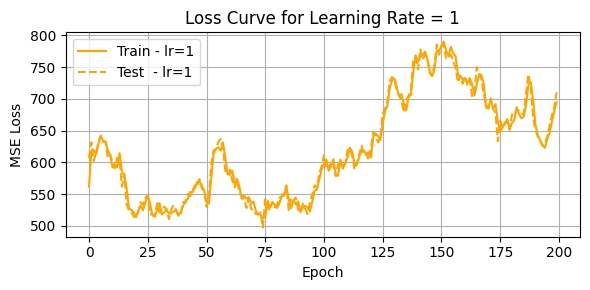

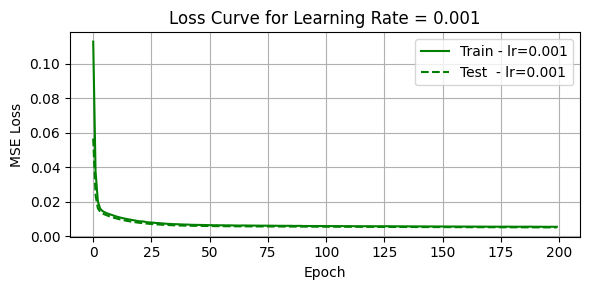

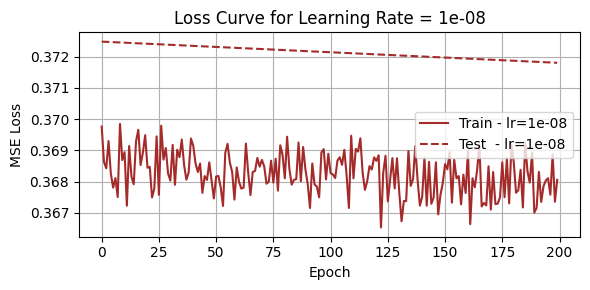

In [ ]:
colors = {1: 'orange', 1e-3: 'green', 1e-8: 'brown'}

for lr in final_lrs:
    plt.figure(figsize=(6, 3))
    plt.plot(final_results[lr][0], color=colors[lr], label=f"Train - lr={lr}")
    plt.plot(final_results[lr][1], color=colors[lr], linestyle='--', label=f"Test  - lr={lr}")
    plt.title(f"Loss Curve for Learning Rate = {lr}")
    plt.xlabel("Epoch")
    plt.ylabel("MSE Loss")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


##2.5

Training Deep MLP: 100%|██████████| 200/200 [00:22<00:00,  8.88it/s]


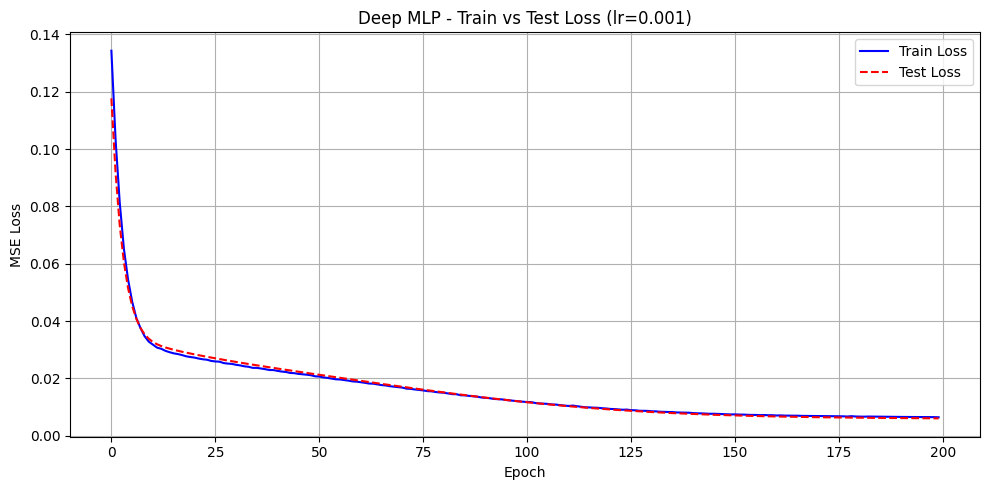

In [ ]:
# -------------------------------
# 1. نصب و ایمپورت کتابخانه‌ها
# -------------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# -------------------------------
# 2. بارگذاری و آماده‌سازی داده‌ها
# -------------------------------
df = pd.read_csv("weather_prediction_dataset.csv")  # فایل داده‌ات رو اول آپلود کن

# فیلتر فقط شهرهای فرانسه
french_cities = ['MONTELIMAR', 'PERPIGNAN', 'TOURS']
filtered_columns = [col for col in df.columns if any(col.startswith(city + '_') for city in french_cities)]
time_columns = [col for col in df.columns if col in ['DATE', 'MONTH']]
final_df = df[time_columns + filtered_columns]

# نرمال‌سازی داده‌ها
data_columns = [col for col in final_df.columns if col not in ['DATE', 'MONTH']]
normalized_data = (final_df[data_columns] - final_df[data_columns].min()) / (final_df[data_columns].max() - final_df[data_columns].min())
preprocessed_df = pd.concat([final_df[['DATE', 'MONTH']], normalized_data], axis=1)
preprocessed_df_clean = preprocessed_df.dropna().reset_index(drop=True)
preprocessed_df_clean['DATE'] = preprocessed_df_clean['DATE'].astype(str)

# ساخت sliding window
window_size = 5
target_column = 'TOURS_temp_max'
X, y, dates = [], [], []

for i in range(len(preprocessed_df_clean) - window_size):
    window = preprocessed_df_clean.iloc[i:i + window_size]
    target_row = preprocessed_df_clean.iloc[i + window_size]
    X.append(window.drop(columns=['DATE', 'MONTH']).values)
    y.append(target_row[target_column])
    dates.append(target_row['DATE'])

X = np.array(X)
y = np.array(y)
dates = np.array(dates)

# تقسیم داده‌ها به train/test با توجه به سال 2009
test_mask = np.char.startswith(dates, '2009')
X_train, y_train = X[~test_mask], y[~test_mask]
X_test, y_test = X[test_mask], y[test_mask]

# تبدیل به tensor
X_train_tensor = torch.tensor(X_train.reshape(X_train.shape[0], -1), dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test.reshape(X_test.shape[0], -1), dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# -------------------------------
# 3. تعریف مدل عمیق‌تر (۳ لایه مخفی)
# -------------------------------
class DeepMLP(nn.Module):
    def __init__(self, input_size):
        super(DeepMLP, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_size, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )

    def forward(self, x):
        return self.net(x)

# -------------------------------
# 4. تابع آموزش مدل عمیق
# -------------------------------
def train_deep_model(learning_rate=0.001, epochs=200):
    model = DeepMLP(input_size=120)
    criterion = nn.MSELoss()
    optimizer = optim.SGD(model.parameters(), lr=learning_rate)

    train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=64)

    train_losses = []
    test_losses = []

    for epoch in tqdm(range(epochs), desc="Training Deep MLP"):
        model.train()
        train_loss = 0
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            y_pred = model(X_batch)
            loss = criterion(y_pred, y_batch)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
        train_losses.append(train_loss / len(train_loader))

        model.eval()
        test_loss = 0
        with torch.no_grad():
            for X_batch, y_batch in test_loader:
                y_pred = model(X_batch)
                loss = criterion(y_pred, y_batch)
                test_loss += loss.item()
        test_losses.append(test_loss / len(test_loader))

    return train_losses, test_losses

# -------------------------------
# 5. آموزش مدل و رسم نمودار
# -------------------------------
deep_train_loss, deep_test_loss = train_deep_model(learning_rate=0.001, epochs=200)

plt.figure(figsize=(10, 5))
plt.plot(deep_train_loss, label='Train Loss', color='blue')
plt.plot(deep_test_loss, label='Test Loss', color='red', linestyle='--')
plt.title("Deep MLP - Train vs Test Loss (lr=0.001)")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#3


In [ ]:
!pip install --upgrade --no-cache-dir gdown
!gdown 1QTi7dJtNAfFR5mG0rd8K3ZGvEIfSn_DS
!unzip PersianData.zip


Downloading...
From: https://drive.google.com/uc?id=1QTi7dJtNAfFR5mG0rd8K3ZGvEIfSn_DS
To: /content/PersianData.zip
100% 7.46k/7.46k [00:00<00:00, 22.2MB/s]
Archive:  PersianData.zip
  inflating: 1.jpg                   
  inflating: 2.jpg                   
  inflating: 3.jpg                   
  inflating: 4.jpg                   
  inflating: 5.jpg                   


In [ ]:
from PIL import Image, ImageDraw
import numpy as np
import random

def convertImageToBinary(path):
    """
    تبدیل تصویر به بردار باینری: سفید = -1، سیاه = 1
    """
    image = Image.open(path).convert("RGB")
    width, height = image.size
    pix = image.load()
    draw = ImageDraw.Draw(image)

    factor = 100
    binary_representation = []

    for i in range(width):
        for j in range(height):
            red, green, blue = pix[i, j]
            total_intensity = red + green + blue

            if total_intensity > (((255 + factor) // 2) * 3):
                binary_representation.append(-1)
                draw.point((i, j), (255, 255, 255))
            else:
                binary_representation.append(1)
                draw.point((i, j), (0, 0, 0))

    return np.array(binary_representation)


In [ ]:
def getNoisyImage(path, noise_level=100):
    """
    نویز تصادفی به تصویر اعمال می‌کند.
    """
    image = Image.open(path).convert("RGB")
    width, height = image.size
    pix = image.load()
    draw = ImageDraw.Draw(image)

    for i in range(width):
        for j in range(height):
            rand = random.randint(-noise_level, noise_level)
            r, g, b = pix[i, j]
            r, g, b = np.clip([r+rand, g+rand, b+rand], 0, 255)
            draw.point((i, j), (int(r), int(g), int(b)))

    return image


In [ ]:
class HopfieldNetwork:
    def __init__(self):
        self.weights = None

    def train(self, patterns):
        """
        آموزش با استفاده از قانون Hebbian
        """
        size = patterns[0].size
        self.weights = np.zeros((size, size))
        for pattern in patterns:
            pattern = pattern.reshape(-1)  # حتماً بردار شود
            self.weights += np.outer(pattern, pattern)
        np.fill_diagonal(self.weights, 0)  # وزن‌های خود-ارتباط را صفر کن

    def predict(self, pattern, steps=5):
        """
        بازسازی تصویر نویزی
        """
        output = pattern.copy().reshape(-1)
        for _ in range(steps):
            output = np.sign(self.weights @ output)
        return output



 testing with noise level 30


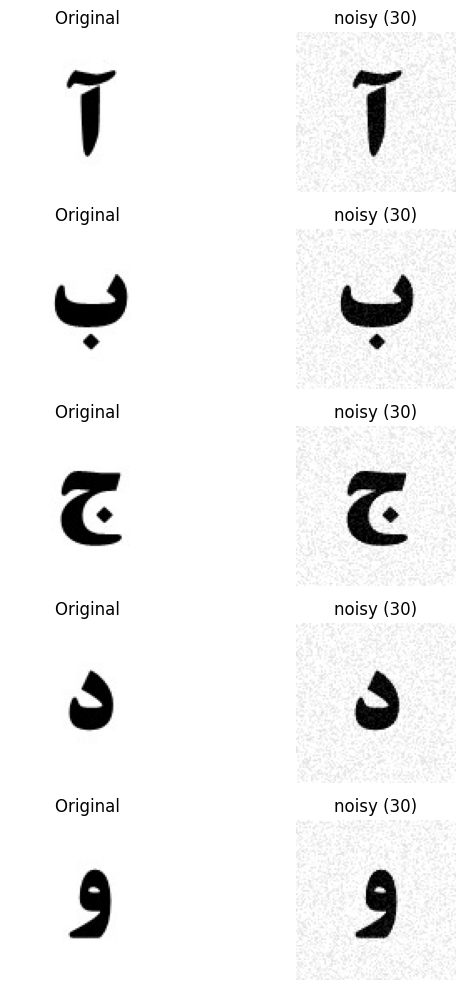


 testing with noise level 60


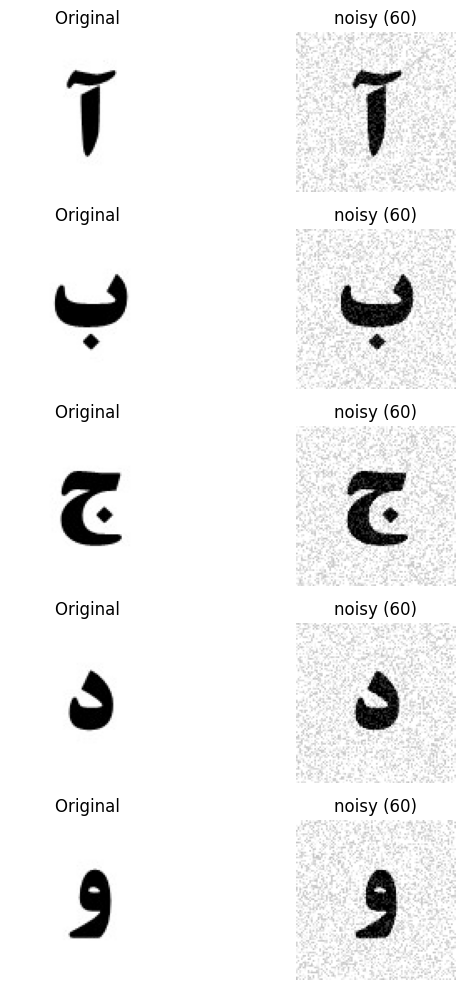


 testing with noise level 90


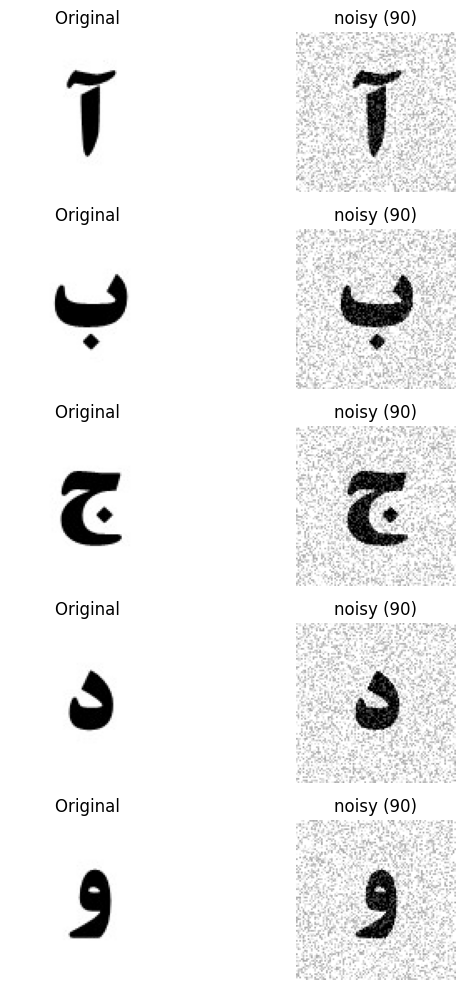


 testing with noise level 120


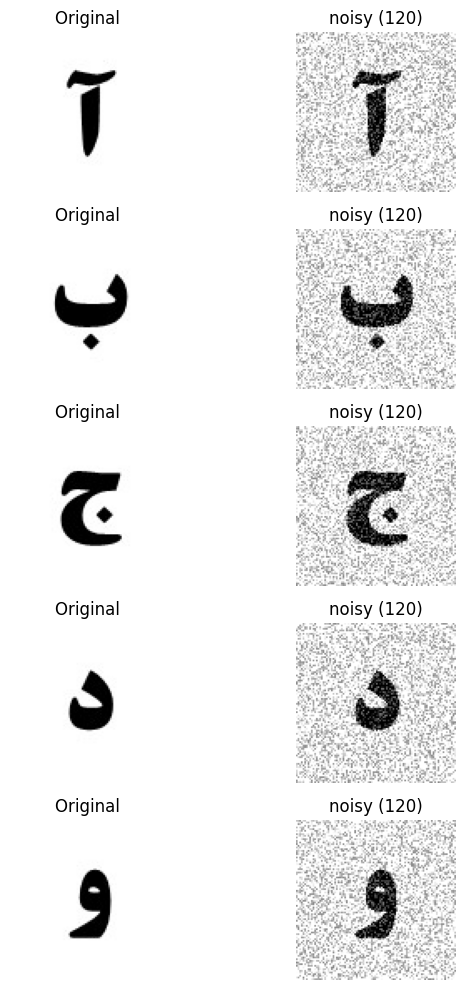

In [ ]:
import matplotlib.pyplot as plt

# لیست تصاویر اصلی
image_paths = [f"/content/{i}.jpg" for i in range(1, 6)]

# تبدیل تصاویر به باینری
patterns = [convertImageToBinary(p) for p in image_paths]

# آموزش شبکه
model = HopfieldNetwork()
model.train(patterns)

# تست شبکه با نویزهای مختلف
noise_levels = [30, 60, 90, 120]

for noise in noise_levels:
    print(f"\n testing with noise level {noise}")
    fig, axs = plt.subplots(len(image_paths), 2, figsize=(7, 10))  # فقط ۲ ستون

    for i, path in enumerate(image_paths):
        # ورودی نویزی بساز
        noisy_img = getNoisyImage(path, noise_level=noise)
        noisy_img.save(f"/content/noisy_{i+1}_n{noise}.jpg")

        # نمایش نتایج
        axs[i, 0].imshow(Image.open(path))
        axs[i, 0].set_title("Original ")
        axs[i, 1].imshow(noisy_img)
        axs[i, 1].set_title(f"noisy ({noise})")

        for ax in axs[i]:
            ax.axis("off")

    plt.tight_layout()
    plt.show()


In [ ]:
def getPointMissingImage(input_path, missing_ratio=0.1):
    """
    حذف درصدی از پیکسل‌ها از تصویر (Point Missing).

    Args:
        input_path (str): مسیر تصویر ورودی.
        missing_ratio (float): نسبت پیکسل‌های حذف‌شده (مثلاً 0.1 برای 10%).

    Returns:
        Image: تصویر با نقاط حذف‌شده.
    """
    # باز کردن تصویر و ایجاد ابزار ترسیم
    image = Image.open(input_path)
    draw = ImageDraw.Draw(image)
    width, height = image.size
    pix = image.load()

    # تعداد پیکسل‌هایی که باید حذف شوند
    total_pixels = width * height
    missing_pixels_count = int(total_pixels * missing_ratio)

    # تولید مختصات تصادفی برای حذف
    missing_coords = random.sample([(x, y) for x in range(width) for y in range(height)], missing_pixels_count)

    # اعمال حذف با رنگ سفید (یا خاکستری دلخواه)
    for x, y in missing_coords:
        draw.point((x, y), (255, 255, 255))  # یا مثلاً (128,128,128) برای خاکستری

    del draw
    return image



 5٪ missing points test 


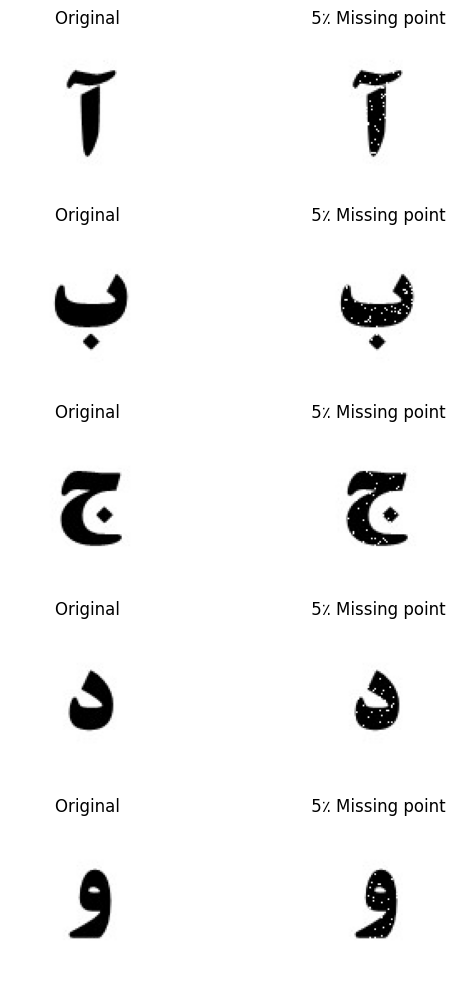


 10٪ missing points test 


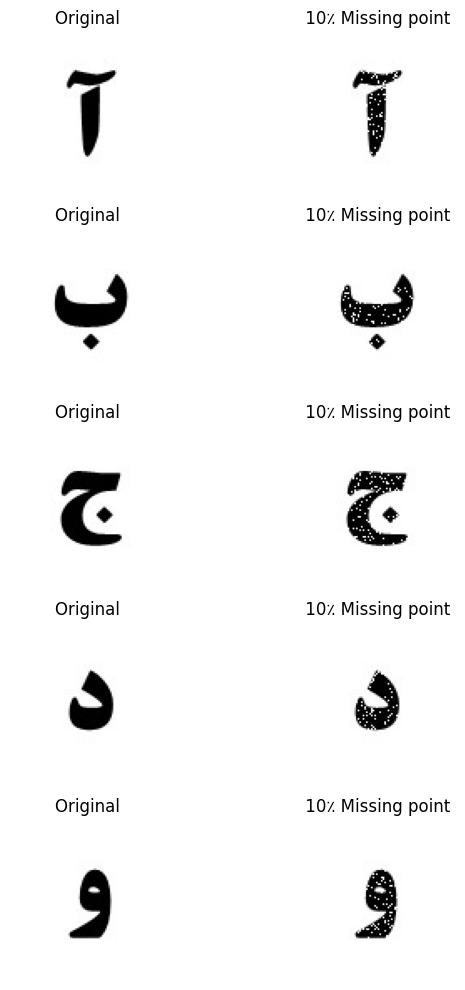


 20٪ missing points test 


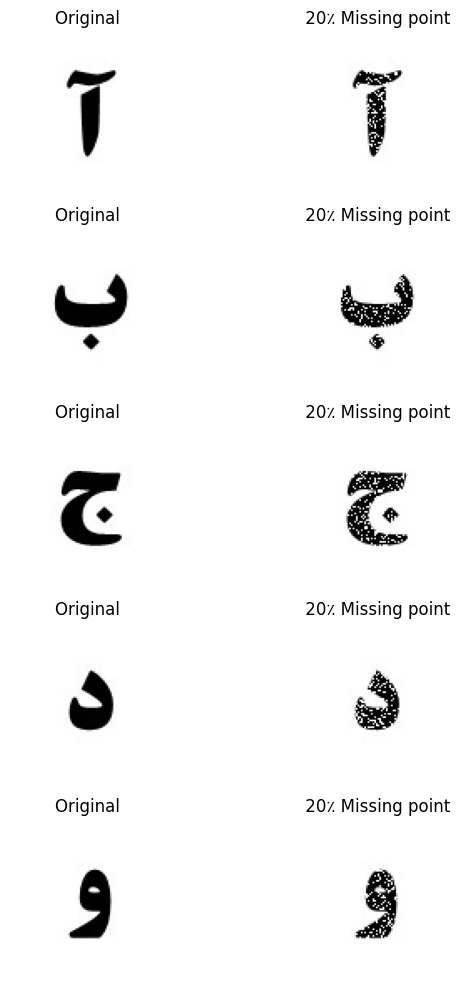


 30٪ missing points test 


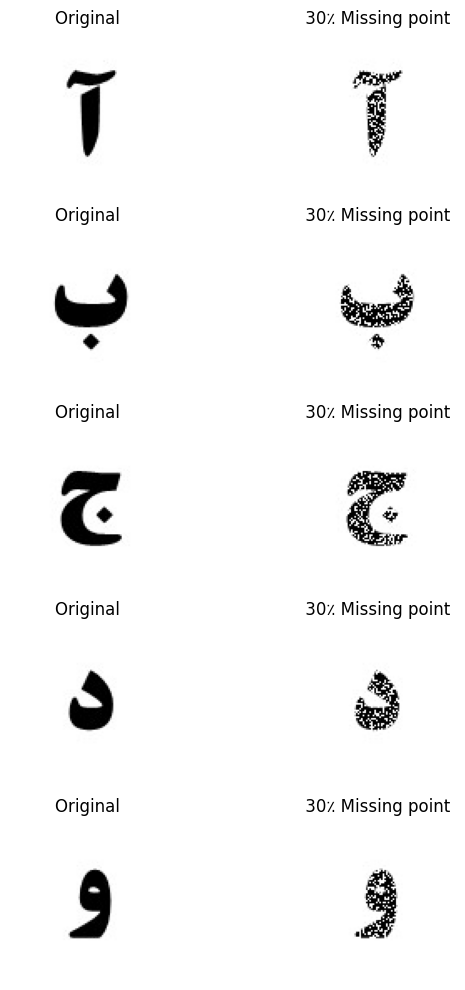

In [ ]:
# نسبت‌های مختلف حذف پیکسل
missing_ratios = [0.05, 0.1, 0.2, 0.3]

for ratio in missing_ratios:
    print(f"\n {int(ratio * 100)}٪ missing points test ")
    fig, axs = plt.subplots(len(image_paths), 2, figsize=(7, 10))

    for i, path in enumerate(image_paths):
        # ساخت نسخه دارای نقاط حذف‌شده
        missing_img = getPointMissingImage(path, missing_ratio=ratio)
        missing_img.save(f"/content/point_missing_{i+1}_r{int(ratio*100)}.jpg")

        # نمایش
        axs[i, 0].imshow(Image.open(path))
        axs[i, 0].set_title("Original ")
        axs[i, 1].imshow(missing_img)
        axs[i, 1].set_title(f" {int(ratio*100)}٪ Missing point")

        for ax in axs[i]:
            ax.axis("off")

    plt.tight_layout()
    plt.show()
